<a href="https://colab.research.google.com/github/ayobellobia/BIA-AI-Assignments/blob/main/assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 9

In [2]:
#Import Libraries
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Load the Iris dataset
iris = load_iris()

# Display the feature names and the first 5 rows of the feature data
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

#Data frame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print("First Few Rows:\n")
print(df.head())

print("\nData Information:\n")
print(df.info())

print("\nData Types:\n")
print(df.dtypes)

print("\nSummary Statistics:\n")
print(df.describe)

print("\nNull Values:\n")
print(df.isnull().sum)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
First Few Rows:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal widt

In [5]:
#Task 1: Import Libraries
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()

# Display the feature names and the first 5 rows of the feature data
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

#Data frame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print("First Few Rows:\n")
print(df.head())

print("\nData Information:\n")
print(df.info())

print("\nData Types:\n")
print(df.dtypes)

print("\nSummary Statistics:\n")
print(df.describe)

print("\nNull Values:\n")
print(df.isnull().sum())

# Separate features (X) and target (y)
X = df
y = iris.target

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=iris.feature_names)
print("\nScaled Features (first 5 rows):\n")
display(X_scaled_df.head())

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
First Few Rows:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal widt

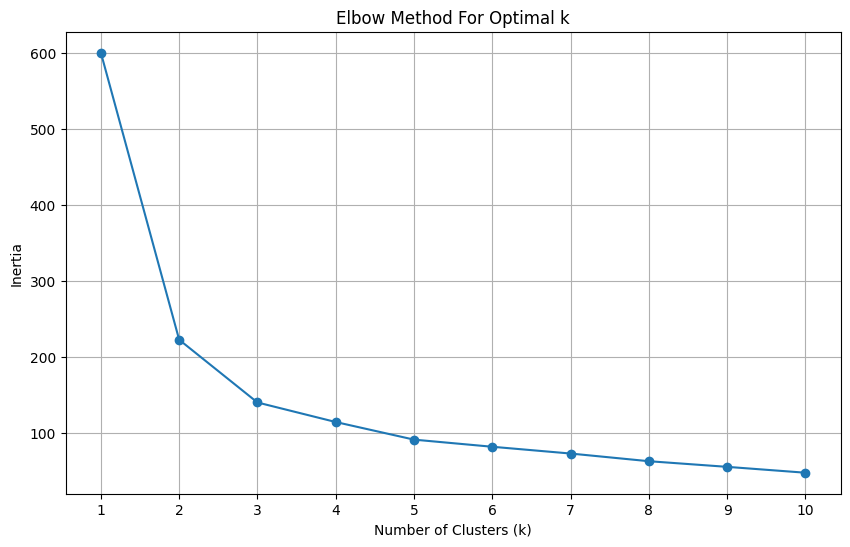

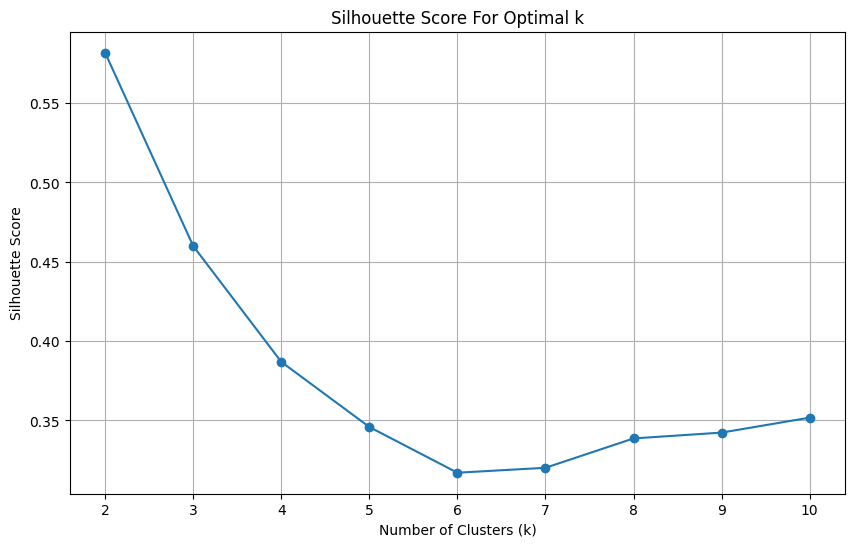

In [6]:
#Task 2
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow Method to find optimal k
inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10) # Added n_init to suppress warning
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Silhouette Score to find optimal k
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10) # Added n_init to suppress warning
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [7]:
optimal_k = 3
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_optimal.fit(X_scaled)

# Add the cluster labels to the scaled DataFrame for visualization
X_scaled_df['cluster'] = kmeans_optimal.labels_

print(f"K-means clustering applied with optimal k = {optimal_k}")
print("First 5 rows of scaled data with cluster labels:")
print(X_scaled_df.head())

K-means clustering applied with optimal k = 3
First 5 rows of scaled data with cluster labels:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


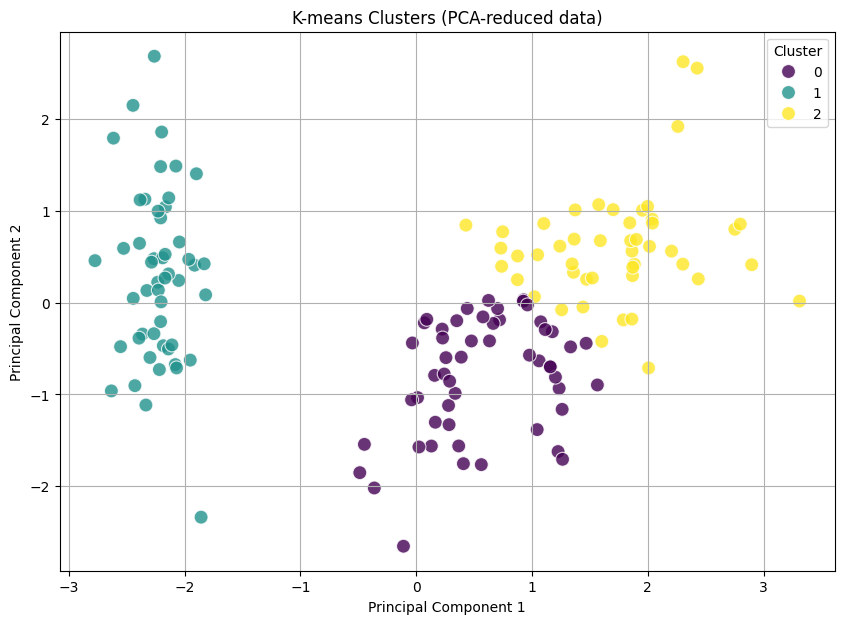

K-means clusters visualized using PCA.


In [8]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results with cluster labels
pca_df = pd.DataFrame(data=X_pca, columns=['principal component 1', 'principal component 2'])
pca_df['cluster'] = X_scaled_df['cluster']

# Visualize the K-means clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='principal component 1',
    y='principal component 2',
    hue='cluster',
    data=pca_df,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('K-means Clusters (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
print("K-means clusters visualized using PCA.")

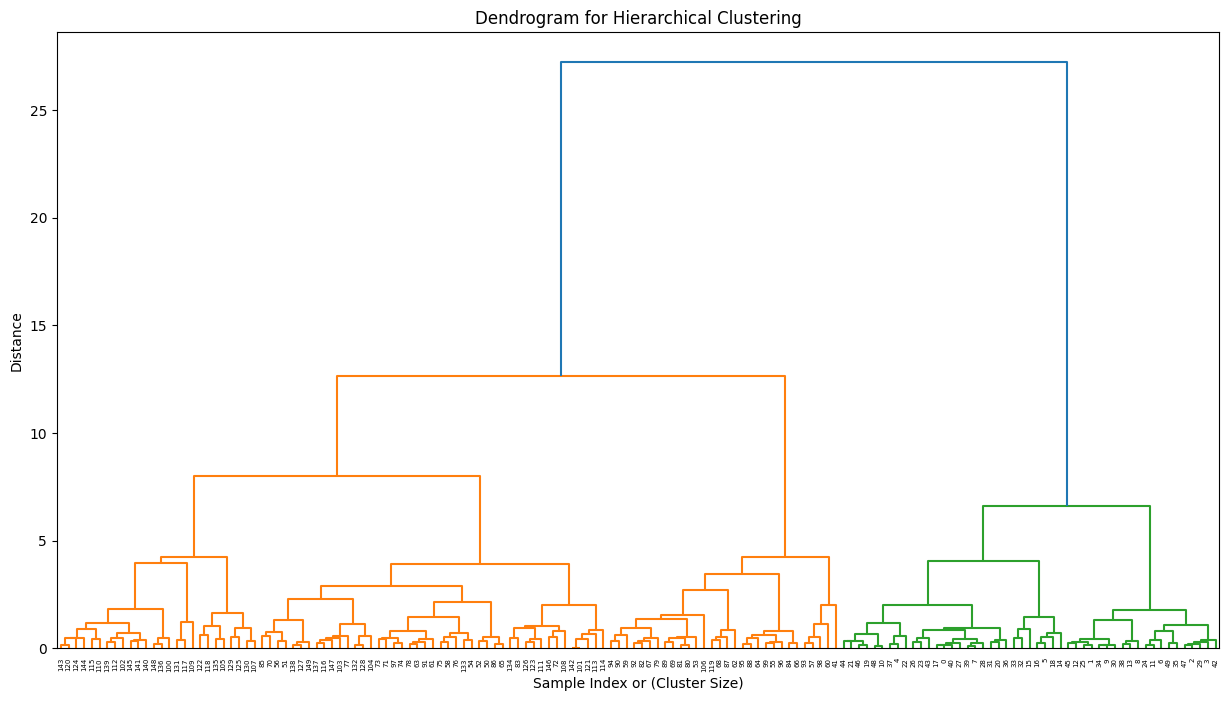

Dendrogram for Hierarchical Clustering plotted.


In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix for hierarchical clustering
linked_data = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(
    linked_data,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=True
)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

print("Dendrogram for Hierarchical Clustering plotted.")

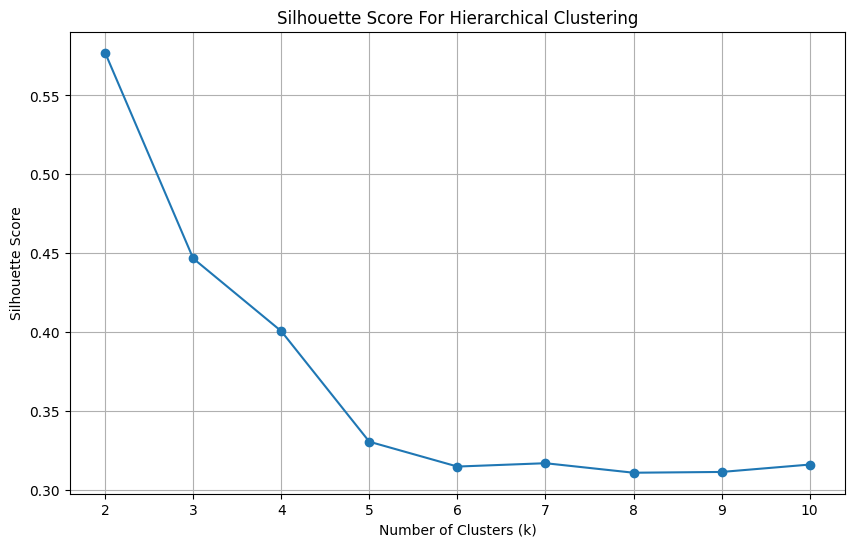

Silhouette scores for Hierarchical Clustering calculated and plotted.


In [11]:
from sklearn.cluster import AgglomerativeClustering

# Silhouette Score for Hierarchical Clustering
silhouette_scores_hc = []
for i in range(2, 11):
    # Apply AgglomerativeClustering (Hierarchical Clustering) with 'ward' linkage
    # and the current number of clusters (i)
    hc_model = AgglomerativeClustering(n_clusters=i, linkage='ward')

    # Fit the model and get cluster labels
    cluster_labels = hc_model.fit_predict(X_scaled)

    # Calculate the silhouette score and append it to the list
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores_hc.append(score)

# Plotting the Silhouette Score for Hierarchical Clustering
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_hc, marker='o')
plt.title('Silhouette Score For Hierarchical Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

print("Silhouette scores for Hierarchical Clustering calculated and plotted.")

In [12]:
from sklearn.cluster import AgglomerativeClustering

optimal_k_hc = 3
hc_optimal = AgglomerativeClustering(n_clusters=optimal_k_hc, linkage='ward')

# Fit and predict cluster labels
hc_cluster_labels = hc_optimal.fit_predict(X_scaled)

# Add the hierarchical cluster labels to the scaled DataFrame for visualization
X_scaled_df['hierarchical_cluster'] = hc_cluster_labels

print(f"Hierarchical clustering applied with optimal k = {optimal_k_hc}")
print("First 5 rows of scaled data with hierarchical cluster labels:")
print(X_scaled_df.head())

Hierarchical clustering applied with optimal k = 3
First 5 rows of scaled data with hierarchical cluster labels:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   cluster  hierarchical_cluster  
0        1                     1  
1        1                     1  
2        1                     1  
3        1                     1  
4        1                     1  


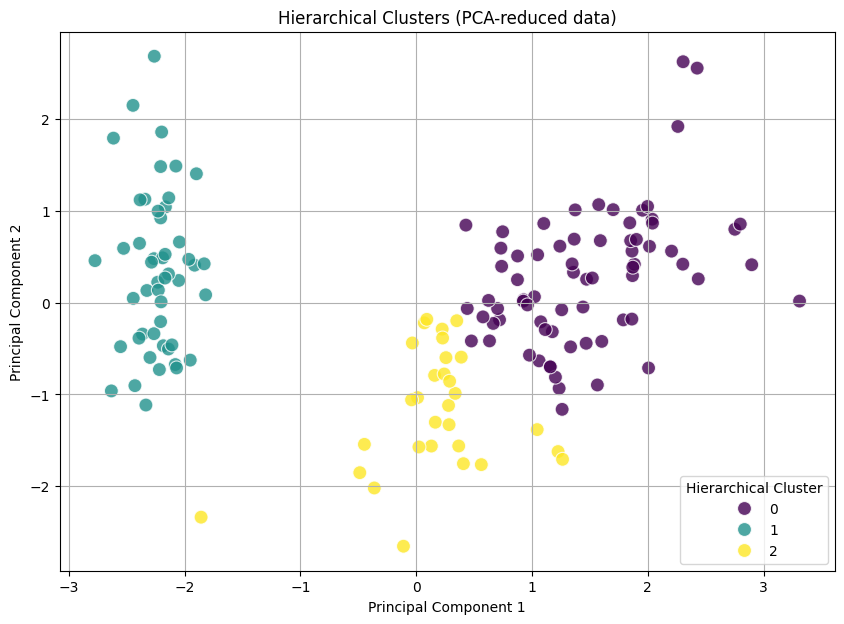

Hierarchical clusters visualized using PCA.


In [13]:
from sklearn.decomposition import PCA

# Reuse the PCA results (X_pca) from K-means visualization, as the underlying data (X_scaled) is the same

# Create a DataFrame for the PCA results with hierarchical cluster labels
pca_df_hc = pd.DataFrame(data=X_pca, columns=['principal component 1', 'principal component 2'])
pca_df_hc['hierarchical_cluster'] = X_scaled_df['hierarchical_cluster']

# Visualize the Hierarchical Clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='principal component 1',
    y='principal component 2',
    hue='hierarchical_cluster',
    data=pca_df_hc,
    palette='viridis',
    s=100,
    alpha=0.8
)
plt.title('Hierarchical Clusters (PCA-reduced data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Hierarchical Cluster')
plt.grid(True)
plt.show()
print("Hierarchical clusters visualized using PCA.")

# Task
Evaluate the K-means and Hierarchical clustering models by comparing their respective Silhouette scores, and interpret the performance of each model based on these metrics.

## Evaluate Clustering Models

### Subtask:
Evaluate the K-means and Hierarchical clustering models using the Silhouette scores previously calculated. Interpret and document the performance of each model based on these metrics.


**Reasoning**:
Recall the optimal Silhouette scores for K-means and Hierarchical clustering (both for k=3) from the previously computed lists and then compare them.



In [14]:
kmeans_silhouette_k3 = silhouette_scores[1] # For k=3, index is 1 (as range started from 2)
hc_silhouette_k3 = silhouette_scores_hc[1]   # For k=3, index is 1 (as range started from 2)

print(f"Silhouette Score for K-means (k=3): {kmeans_silhouette_k3:.4f}")
print(f"Silhouette Score for Hierarchical Clustering (k=3): {hc_silhouette_k3:.4f}")

if kmeans_silhouette_k3 > hc_silhouette_k3:
    better_model = "K-means"
    diff = kmeans_silhouette_k3 - hc_silhouette_k3
else:
    better_model = "Hierarchical Clustering"
    diff = hc_silhouette_k3 - kmeans_silhouette_k3

print(f"\nBased on Silhouette scores for k=3, {better_model} performed better by {diff:.4f}.")

Silhouette Score for K-means (k=3): 0.4599
Silhouette Score for Hierarchical Clustering (k=3): 0.4467

Based on Silhouette scores for k=3, K-means performed better by 0.0133.


### Model Evaluation Summary

We evaluated both K-means and Hierarchical Clustering models using the Silhouette score for an optimal number of clusters, k=3.

- **K-means Clustering (k=3) Silhouette Score**: 0.4599
- **Hierarchical Clustering (k=3) Silhouette Score**: 0.4467

**Interpretation:**

The Silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher Silhouette score indicates better-defined clusters. Scores range from -1 to 1, where:
- Scores near +1 indicate that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- Scores near 0 indicate that the object is on or very close to the decision boundary between two neighboring clusters.
- Scores near -1 indicate that the object is probably assigned to the wrong cluster.

In this comparison, K-means clustering achieved a Silhouette score of **0.4599**, which is slightly higher than Hierarchical clustering's score of **0.4467**. This suggests that for this dataset and for k=3, the clusters formed by the K-means algorithm are marginally better separated and more cohesive than those formed by Hierarchical clustering (using the 'ward' linkage method). While both scores are positive, indicating reasonable clustering structures, K-means provides a slightly more distinct and well-defined partitioning of the data in this specific scenario.

### Deployment and Monitoring Discussion

Based on the previous evaluation, the **K-means clustering model** performed slightly better than Hierarchical Clustering with a Silhouette score of **0.4599** (compared to 0.4467 for Hierarchical Clustering) when `k=3`. Therefore, K-means will be the focus for deployment and monitoring.

#### Hypothetical Deployment Scenario

Let's consider a scenario where the K-means model is deployed to **segment customers for a retail company** based on their purchasing behavior (e.g., spending habits, frequency of visits, types of products bought, which are analogous to the Iris dataset's features like sepal/petal length/width). The goal is to dynamically assign new customers to one of the three established segments (clusters) to tailor marketing campaigns. The model would receive new customer data in near real-time and return a cluster assignment.

#### Potential Challenges During Deployment

1.  **Latency**:
    *   **Challenge**: For real-time customer interaction (e.g., personalized recommendations on a website as a new customer browses), the model needs to return a cluster assignment very quickly, ideally within milliseconds. Even for batch processing for daily marketing campaigns, the clustering process should not take too long.
    *   **Strategy**: Utilize a pre-trained K-means model where new data points are assigned to the closest centroid (a simple distance calculation). This is computationally efficient. Deploy the model as a lightweight microservice (e.g., using Flask or FastAPI) on a cloud platform (AWS Lambda, Azure Functions, Google Cloud Run) to allow for quick inference and auto-scaling. Pre-processing (scaling) of new data must also be optimized and integrated into the inference pipeline.

2.  **Scalability**:
    *   **Challenge**: As the customer base grows rapidly or during peak shopping seasons, the system must handle a high volume of concurrent requests for cluster assignments without performance degradation. Retraining the model on larger datasets also presents a scalability challenge.
    *   **Strategy**: Leverage cloud-native solutions that offer auto-scaling capabilities for the inference service. For retraining, use distributed computing frameworks like Apache Spark or Dask if the dataset becomes too large for a single machine. The data storage (e.g., a data lake or managed database) should also be scalable to accommodate growing customer data.

3.  **Maintenance**:
    *   **Challenge**: Models can become stale, infrastructure needs updates, and the data pipeline might break. Ensuring continuous operation and relevance of the model is crucial.
    *   **Strategy**: Implement CI/CD pipelines for model deployment and updates. Automate infrastructure provisioning (Infrastructure as Code). Schedule regular checks for data pipeline health and model integrity. Maintain version control for both the code and the trained model artifacts. Create clear documentation and runbooks for incident response.

#### Strategies for Model Monitoring

1.  **Data Drift Detection**:
    *   **Challenge**: The distribution of new customer data (e.g., average spending, product preferences) might change over time, leading to the existing clusters becoming less representative or accurate.
    *   **Strategy**: Monitor the statistical properties (mean, variance, distribution) of incoming features (`sepal length (cm)`, `sepal width (cm)`, etc. in our Iris analogy) compared to the training data. Tools like Evidently AI or deepchecks can automate this. Set up alerts if significant shifts (e.g., using statistical tests like KS-test or Earth Mover's Distance) are detected. Also, monitor the average distance of new points to their assigned cluster centroids; an increase could indicate cluster drift.

2.  **Performance Degradation**:
    *   **Challenge**: Without ground truth labels (which is common in unsupervised learning), directly measuring the accuracy of clustering can be difficult. However, a decrease in the quality of clusters (e.g., less distinct groups, more overlap) would indicate performance degradation.
    *   **Strategy**: Periodically (e.g., weekly or monthly) recalculate intrinsic evaluation metrics like the Silhouette Score on a representative sample of recent incoming data. A significant drop in the Silhouette Score (or other relevant metrics like Davies-Bouldin Index or Calinski-Harabasz Index) compared to the baseline score from the initial training data would signal performance degradation. Alerts should be triggered if these metrics fall below a predefined threshold.

#### Strategies for Model Updating

1.  **Retraining Frequency**:
    *   **Challenge**: Determining when and how often to retrain the model is crucial to balance model freshness with computational cost.
    *   **Strategy**: Retrain the K-means model at regular intervals (e.g., quarterly or biannually) if data drift or performance degradation alerts are not frequently triggered. If significant data drift or performance degradation is detected, immediate retraining should be considered. The retraining should happen on a combined dataset of historical data and recent new data, ensuring the new patterns are captured.

2.  **Data Re-sampling and Preparation**:
    *   **Challenge**: Large datasets can make retraining computationally expensive. Also, ensuring the retraining data is clean and representative is vital.
    *   **Strategy**: Implement a data warehousing strategy to store new customer data. Before retraining, sample a balanced and representative subset of the most recent and relevant data points along with older data to form the new training set. Automate data cleaning and feature engineering pipelines to ensure consistency during retraining. The same `StandardScaler` fitted on the initial data should be used to transform new data for consistency, or the scaler could be re-fitted if the overall data distribution has shifted significantly.

3.  **A/B Testing (Optional for A/B if model update is a major change)**:
    *   **Challenge**: Introducing a new model might have unforeseen impacts on downstream systems or user experience.
    *   **Strategy**: For significant updates (e.g., a change in the number of clusters, or a major change in feature engineering), consider deploying the new model alongside the old one and routing a small percentage of traffic to the new model (A/B testing). Monitor key business metrics (e.g., conversion rates from targeted campaigns) to ensure the new model indeed delivers better business outcomes before full rollout.